In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Social_Network_Ads.csv')

In [3]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [4]:
df.shape

(400, 5)

In [5]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [6]:
df.tail()

,User ID,Gender,Age,EstimatedSalary,Purchased
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [8]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [9]:
df.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [10]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [11]:
#as we can see there is no null values

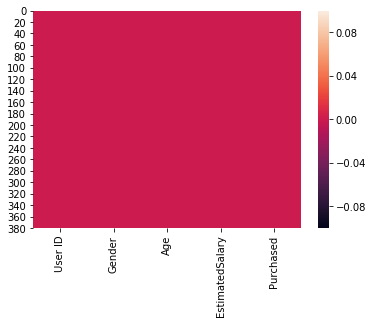

In [12]:
sns.heatmap(df.isnull())

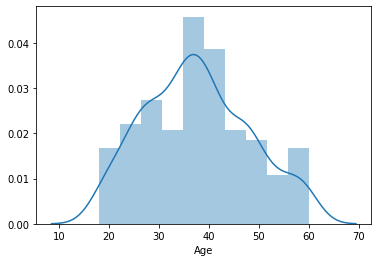

In [13]:
sns.distplot(df['Age'])

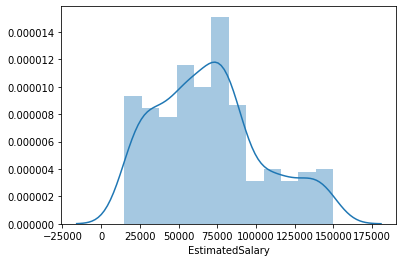

In [14]:
sns.distplot(df['EstimatedSalary'])

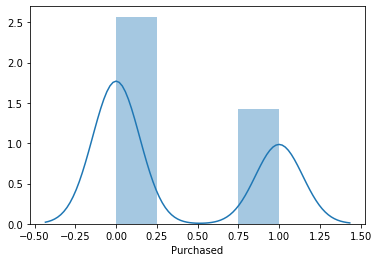

In [15]:
sns.distplot(df['Purchased'])

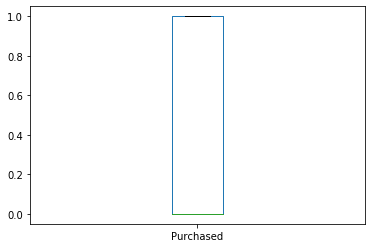

In [16]:
df['Purchased'].plot.box()

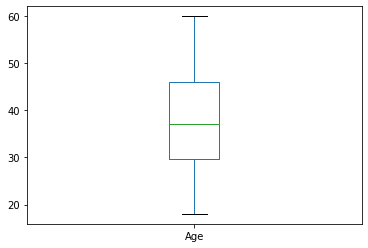

In [17]:
df['Age'].plot.box()

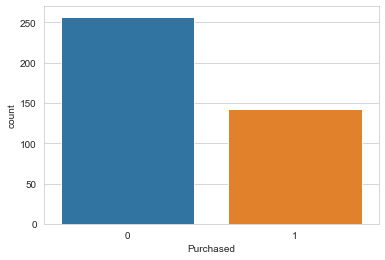

In [18]:
sns.set_style('whitegrid')
sns.countplot(x='Purchased',data=df)

In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
le=LabelEncoder()
df['Gender']=le.fit_transform(df['Gender'])

In [21]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0
...,...,...,...,...,...
395,15691863,0,46,41000,1
396,15706071,1,51,23000,1
397,15654296,0,50,20000,1
398,15755018,1,36,33000,0


In [22]:
df.drop('User ID',axis=1,inplace=True)
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


In [23]:
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]

In [24]:
x.shape

(400, 3)

In [25]:
y.shape

(400,)

In [26]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x=scale.fit_transform(x)

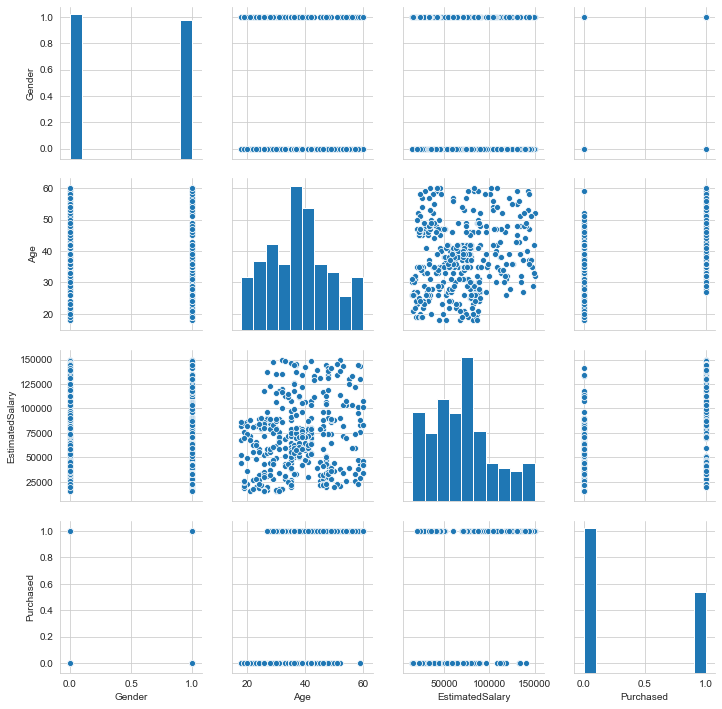

In [27]:
sns.pairplot(df)

In [28]:
collist=df.columns.values
ncol=5
nrows=10

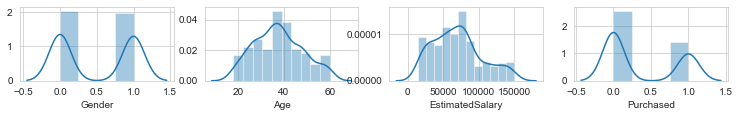

In [29]:
plt.figure(figsize=(16,16))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(df[collist[i]])

In [30]:
#removing outliers:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[1.02020406, 1.78179743, 1.49004624, 0.74593581],
       [1.02020406, 0.25358736, 1.46068138, 0.74593581],
       [0.98019606, 1.11320552, 0.78528968, 0.74593581],
       ...,
       [0.98019606, 1.17910958, 1.46068138, 1.34059793],
       [1.02020406, 0.15807423, 1.07893824, 0.74593581],
       [0.98019606, 1.08359645, 0.99084367, 1.34059793]])

In [31]:
threshold=3
print(np.where(z>3))

(array([], dtype=int64), array([], dtype=int64))


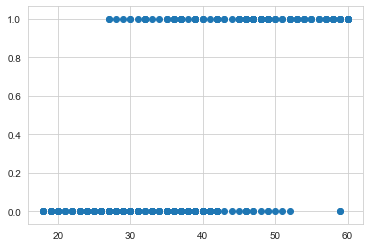

In [32]:
x=df['Age']
y=df['Purchased']
plt.scatter(x,y)
plt.show()

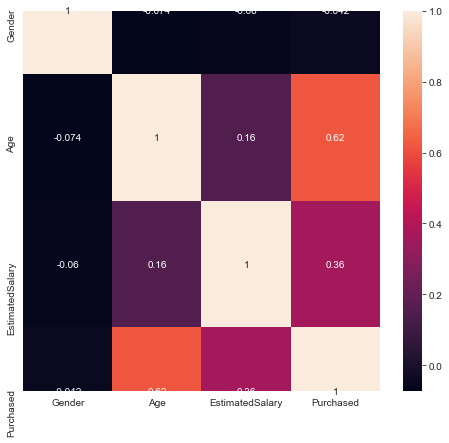

In [33]:
corr_hmap=df.corr()
plt.figure(figsize=(8,7))
sns.heatmap(corr_hmap,annot=True)
plt.show()

In [34]:
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]

In [35]:
x.shape

(400, 3)

In [36]:
y.shape

(400,)

In [69]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=43)

In [70]:
x_train.shape

(312, 3)

In [71]:
y_train.shape

(312,)

In [72]:
x_test.shape

(88, 3)

In [73]:
y_test.shape

(88,)

In [74]:
lg=LogisticRegression()

In [75]:
lg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [76]:
pred=lg.predict(x_test)
print("accuracy_score :",accuracy_score(pred,y_test))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy_score : 0.75
[[50  7]
 [15 16]]
              precision    recall  f1-score   support

           0       0.77      0.88      0.82        57
           1       0.70      0.52      0.59        31

    accuracy                           0.75        88
   macro avg       0.73      0.70      0.71        88
weighted avg       0.74      0.75      0.74        88



In [77]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
predgnb=gnb.predict(x_test)
print(accuracy_score(y_test,predgnb))
print(confusion_matrix(y_test,predgnb))
print(classification_report(y_test,predgnb))

0.8181818181818182
[[49  8]
 [ 8 23]]
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        57
           1       0.74      0.74      0.74        31

    accuracy                           0.82        88
   macro avg       0.80      0.80      0.80        88
weighted avg       0.82      0.82      0.82        88



In [78]:
svc=SVC()
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.6477272727272727
[[54  3]
 [28  3]]
              precision    recall  f1-score   support

           0       0.66      0.95      0.78        57
           1       0.50      0.10      0.16        31

    accuracy                           0.65        88
   macro avg       0.58      0.52      0.47        88
weighted avg       0.60      0.65      0.56        88



In [79]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.8409090909090909
[[48  9]
 [ 5 26]]
              precision    recall  f1-score   support

           0       0.91      0.84      0.87        57
           1       0.74      0.84      0.79        31

    accuracy                           0.84        88
   macro avg       0.82      0.84      0.83        88
weighted avg       0.85      0.84      0.84        88



In [80]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
predknn=knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.7840909090909091
[[52  5]
 [14 17]]
              precision    recall  f1-score   support

           0       0.79      0.91      0.85        57
           1       0.77      0.55      0.64        31

    accuracy                           0.78        88
   macro avg       0.78      0.73      0.74        88
weighted avg       0.78      0.78      0.77        88



In [81]:
from sklearn.ensemble import RandomForestClassifier

In [82]:
rf=RandomForestClassifier(n_estimators=100,random_state=47)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.8522727272727273
[[49  8]
 [ 5 26]]
              precision    recall  f1-score   support

           0       0.91      0.86      0.88        57
           1       0.76      0.84      0.80        31

    accuracy                           0.85        88
   macro avg       0.84      0.85      0.84        88
weighted avg       0.86      0.85      0.85        88



In [83]:
#here RFC gives the best result: